In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

import seaborn as sns

In [2]:
#reading training data
df = pd.read_csv("/kaggle/input/titanic/train.csv")

## Data Exploration 

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Taking care of NaN values and missing data

In [5]:
#Most of 'Cabin' values are missing so let's just drop the feature
df.drop(['Cabin'],
        axis=1,
        inplace=True)

#I decided to still use the 'Age' feature despite the 177 Nan values 
df['Age'].fillna(df['Age'].mean(),
                 inplace=True)

#There is a couple of Nan values still on the 'Embarked' feature which we can drop 
df.dropna(inplace=True)


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.653446,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.968366,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## In depth Data Exploration 

I start by exploring the numerical and the categorical data separately 

In [7]:
df_num = df[['Age','SibSp','Parch','Fare']]
df_cat = df[['Survived','Pclass','Sex','Embarked']]

### Numerical Data 

In order to ovisualize the distributions of each fiture it is usefull to build histograms. 

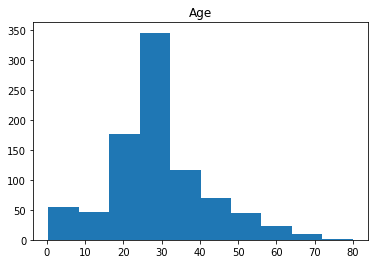

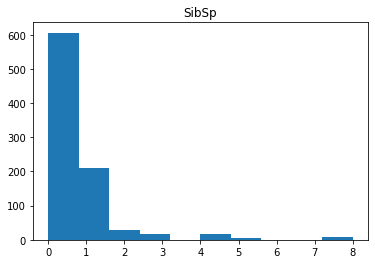

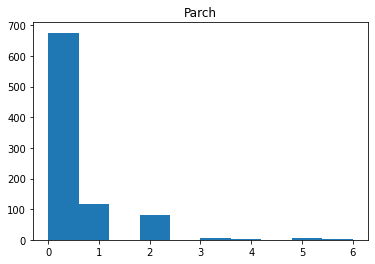

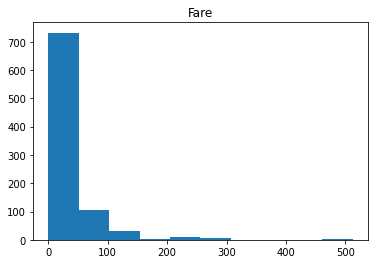

In [8]:
for col in df_num.columns:
    plt.hist(df_num[col])
    plt.title(col)
    plt.show()

Next I look for possible relationships between the numerical data and the output 'Survived'

In [9]:
pd.pivot_table(df, index = 'Survived',
               aggfunc=[np.mean], 
               values = df_num.columns)

mean                               
              Age       Fare     Parch     SibSp
Survived                                        
0         30.4151  22.117887  0.329690  0.553734
1         28.4236  48.209498  0.467647  0.476471

It appears as if the young (avg age=28.4) and rich (avg fare=48) had a higher chance of surviving. 
Also those who had parents/children aboard the Titanic.

### Categorical Data
For the categorical data we can display barplots representing the distributions of each feature: 

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


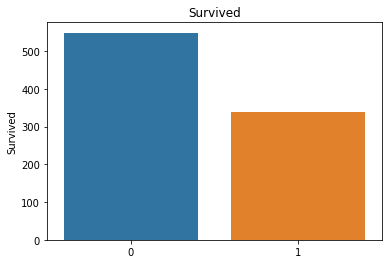

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


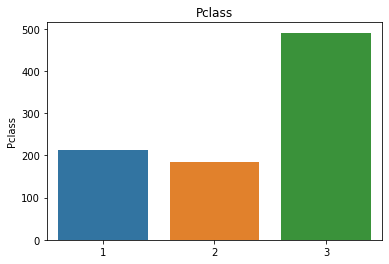

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


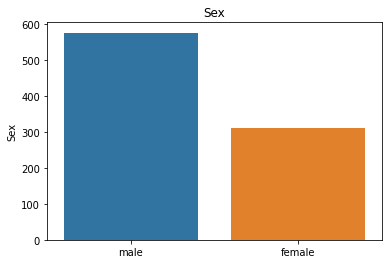

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


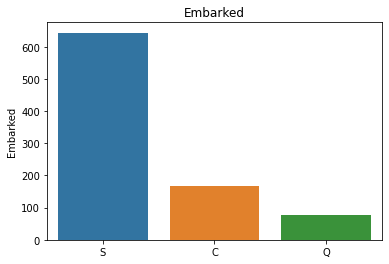

In [10]:
for col in df_cat.columns:
    sns.barplot(df_cat[col].value_counts().index, df_cat[col].value_counts()).set_title(col)
    plt.show()

In [11]:
# Comparing survival and each of these categorical variables 
print(pd.pivot_table(df, index = 'Survived', columns = 'Pclass', values = 'PassengerId' ,aggfunc ='count'))
print()
print(pd.pivot_table(df, index = 'Survived', columns = 'Sex', values = 'PassengerId' ,aggfunc ='count'))
print()
print(pd.pivot_table(df, index = 'Survived', columns = 'Embarked', values = 'PassengerId' ,aggfunc ='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         134  87  119

Sex       female  male
Survived              
0             81   468
1            231   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


On the one hand, traveling in "First Class" may have increased your chances of surviving since 134 out of the 214 survived. On the other hand, "Third Class" travelers had little chances of surviving.

Female passangers were dembarked first and had a higher chance of surviving while approximately 5 out of every 6 male passengers died. 

The ratios of survival of each port are very similar. 

In [12]:
#select columns to be used in training
good_features = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
X = df[good_features]
y = df.Survived

In [13]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.000000,1,0,7.2500,S
1,1,female,38.000000,1,0,71.2833,C
2,3,female,26.000000,0,0,7.9250,S
3,1,female,35.000000,1,0,53.1000,S
4,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.000000,0,0,13.0000,S
887,1,female,19.000000,0,0,30.0000,S
888,3,female,29.699118,1,2,23.4500,S
889,1,male,26.000000,0,0,30.0000,C


### Encoding Categorical Data using One Hot Encoder

After the following transformations, the matrix X will have 12 columns: 3 clomuns corresponding to the feature 'Pclass', 2 columns for the 'Sex' feature, 3 columns for the 'Embarked' feature and 1 column for the rest of the features. 

In [14]:
# "ct" stands for the object of the Column Transformer class 
# transformers specifies the kind of transformation we want to perform and 
# to which column ([0]) ; remainder tells what to do with the rest of the columns 
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,1,6])], 
                       remainder='passthrough')
X = np.array(ct.fit_transform(X))
X.shape

(889, 12)

In [15]:
#split dataset into trainig and cross-validation data from training data
X_train, X_val, y_train, y_val = train_test_split(X,y,random_state = 0,test_size=0.3)

## After the training and c-validating sets have been splitted we can define the Feature Sclaing transformation using the training set and apply it to both the training set and the cv set. 

In [16]:
sc = StandardScaler()
X_train[:,8:] = sc.fit_transform(X_train[:,8:])
X_val[:,8:] = sc.transform(X_val[:,8:])

## Building the model and training it

In [17]:
classifier = RandomForestClassifier(n_estimators = 100,
                                   criterion='gini',
                                   min_samples_split=10,
                                   min_samples_leaf=7)
classifier.fit(X_train,y_train)

RandomForestClassifier(min_samples_leaf=7, min_samples_split=10)

### Using the trained model we predict the y_pred values of the cross-validation set (X_val,y_val)

In [18]:
y_pred = classifier.predict(X_val)

In [19]:
cm = confusion_matrix(y_val, y_pred)
print(cm)
accuracy_score(y_val, y_pred)

[[141  16]
 [ 42  68]]


0.7827715355805244

In [20]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       157
           1       0.81      0.62      0.70       110

    accuracy                           0.78       267
   macro avg       0.79      0.76      0.77       267
weighted avg       0.79      0.78      0.78       267



## Make predictions on test set and send it to submission

In [21]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [22]:
X_test = test_data[good_features]
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


In [23]:
X_test.isna().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [24]:
#fill the null values with the mean
X_test['Age'].fillna(X_test['Age'].mean(),
                 inplace=True)

X_test['Fare'].fillna(X_test['Fare'].mean(),
                 inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [25]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.50000,0,0,7.8292,Q
1,3,female,47.00000,1,0,7.0000,S
2,2,male,62.00000,0,0,9.6875,Q
3,3,male,27.00000,0,0,8.6625,S
4,3,female,22.00000,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,30.27259,0,0,8.0500,S
414,1,female,39.00000,0,0,108.9000,C
415,3,male,38.50000,0,0,7.2500,S
416,3,male,30.27259,0,0,8.0500,S


In [26]:
X_test = np.array(ct.transform(X_test))
X_test.shape

(418, 12)

In [27]:
X_test[1,:]

array([ 0.,  0.,  1.,  1.,  0.,  0.,  0.,  1., 47.,  1.,  0.,  7.])

In [28]:
X_test[:,8:] = sc.transform(X_test[:,8:])

In [29]:
predictions = classifier.predict(X_test)

In [30]:
#saving output in submission.csv
output = pd.DataFrame({'PassengerId': test_data.PassengerId,
                       'Survived': predictions})
output.to_csv('submission.csv', index=False)